In [48]:
import numpy as np

In [49]:
from scipy import signal 

In [50]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [157]:
2.6841-0.67

2.0141

In [51]:
fs = 102400
duration_time = 0.001
duration_count = int(duration_time*fs)
time_s = np.arange(duration_count)/fs
f = (10000-3000)/duration_time*time_s + 3000
s = np.sin(2*np.pi*f*time_s)
window = signal.get_window("hann", len(s), True)
window_s = s*window
duration_total = int(0.005*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

In [209]:
time_delay_1 = 0.00133
time_delay_2 = 0.00182
time_delay_3 = 0.0020141

alpha_1 = 0.06
alpha_2 = 0.132
alpha_3 = 0.3
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))
s_2 = np.concatenate((np.zeros(int(time_delay_2*fs)), alpha_2*window_s))
s_2 = np.concatenate((s_2, np.zeros(duration_total-len(s_2))))
s_3 = np.concatenate((np.zeros(int(time_delay_3*fs)), alpha_3*window_s))
s_3 = np.concatenate((s_3, np.zeros(duration_total-len(s_3))))
np.random.seed(0)
signal_distorted = s_origin + s_1 + s_2 + s_3 + 0.005*np.random.randn(len(s_origin))
# signal_distorted = s_origin + s_1 + 0.005*np.random.randn(len(s_origin))

<IPython.core.display.Javascript object>


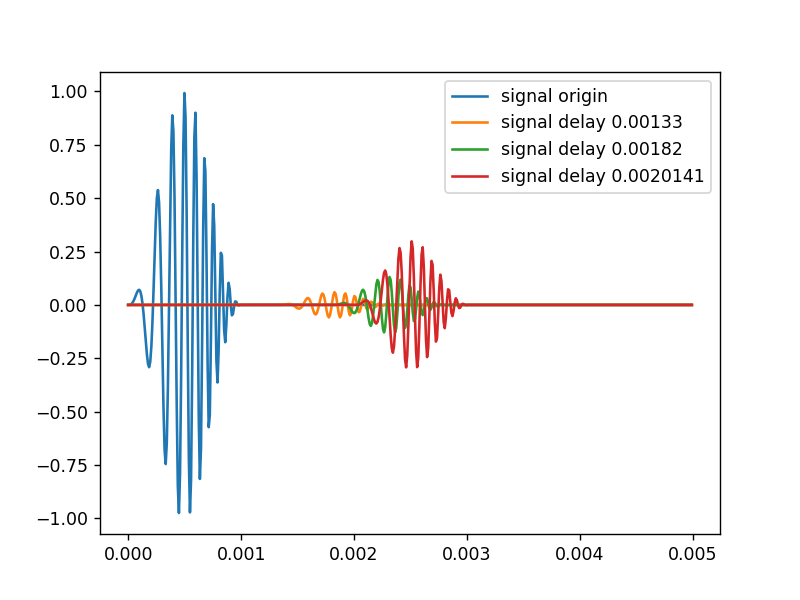

In [210]:
fig, ax = plt.subplots()
ax.plot(time, s_origin, label="signal origin")
ax.plot(time, s_1, label="signal delay {}".format(time_delay_1))
ax.plot(time, s_2, label="signal delay {}".format(time_delay_2))
ax.plot(time, s_3, label="signal delay {}".format(time_delay_3))
ax.legend()

<IPython.core.display.Javascript object>


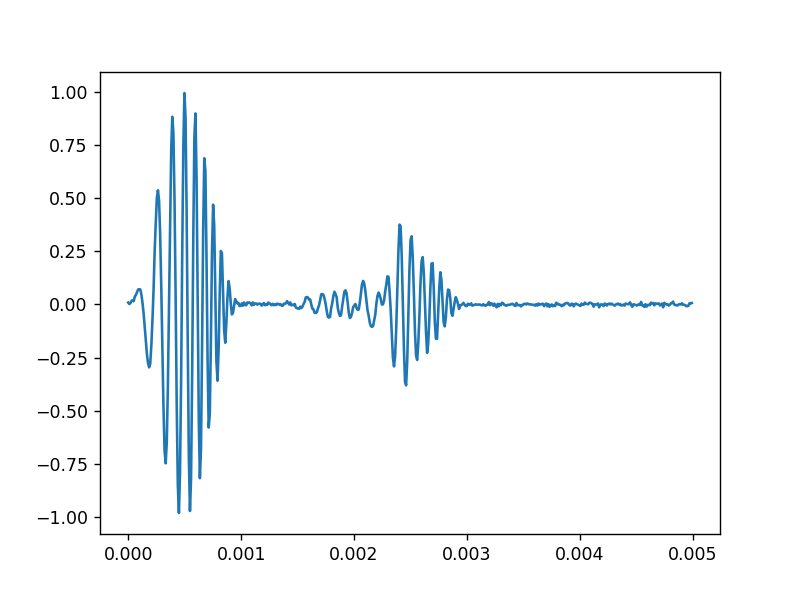

In [211]:
fig, ax = plt.subplots()
ax.plot(time, signal_distorted)

In [161]:
template = window_s
fir_coeff = template[::-1]

<IPython.core.display.Javascript object>


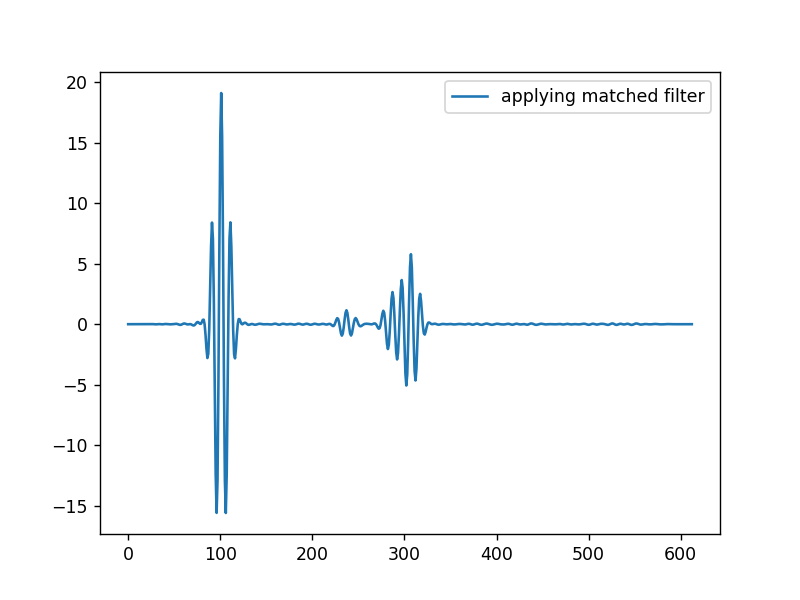

In [212]:
# det_1 = signal.lfilter(fir_coeff, 1, signal_distorted)
det_2 = np.convolve(fir_coeff, signal_distorted, "full")
fig, ax = plt.subplots()
ax.plot(det_2, label="applying matched filter")
ax.legend()

In [213]:
signal_1 = det_2[:200]
arg_1 = np.argmax(signal_1)
signal_2 = det_2[200:250]
arg_2 = np.argmax(signal_2)+200
zero_1 = arg_2-arg_1
zero_1/102400

0.001328125

In [173]:
(0.001328125-0.00133)/0.00133*100

-0.1409774436090168

In [57]:
signal_1 = det_2[:200]
signal_2 = det_2[250:350]
signal_3 = det_2[350:450]

In [58]:
arg_1 = np.argmax(signal_1)
arg_2 = np.argmax(signal_2)+250
arg_3 = np.argmax(signal_3)+350

In [59]:
arg_2-arg_1

204

In [60]:
arg_3-arg_1

256

In [28]:
204/102400-0.002

-7.812500000000007e-06

In [27]:
256/102400

0.0025

<IPython.core.display.Javascript object>


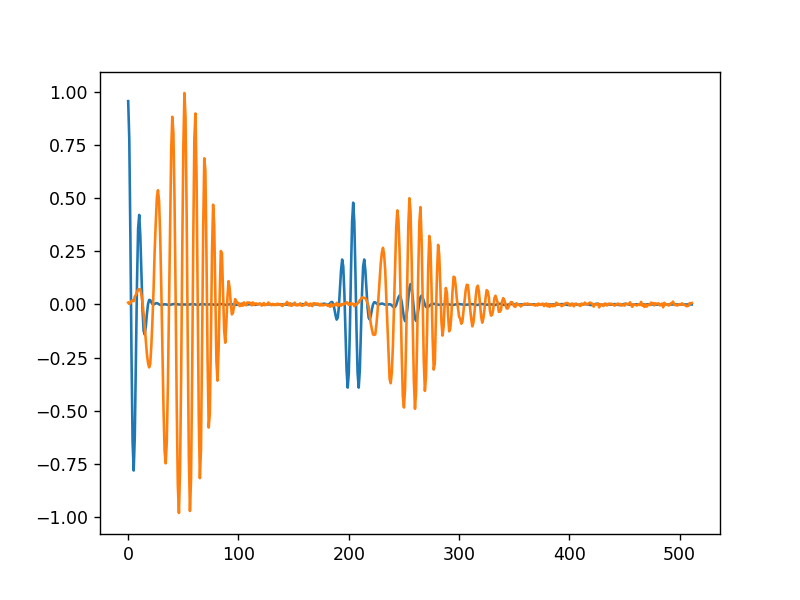

In [21]:
fig, ax = plt.subplots()
ax.plot(det_2[101:]/20)
ax.plot(signal_distorted)

In [15]:
len(window_s)

102

In [20]:
arg_1

101

In [22]:
zero_1 = arg_2-arg_1
zero_2 = arg_3-arg_1
assumpt_signal_1 = np.concatenate((np.zeros(zero_1), alpha_1*window_s))
assumpt_signal_2 = np.concatenate((np.zeros(zero_2), alpha_2*window_s))

<IPython.core.display.Javascript object>


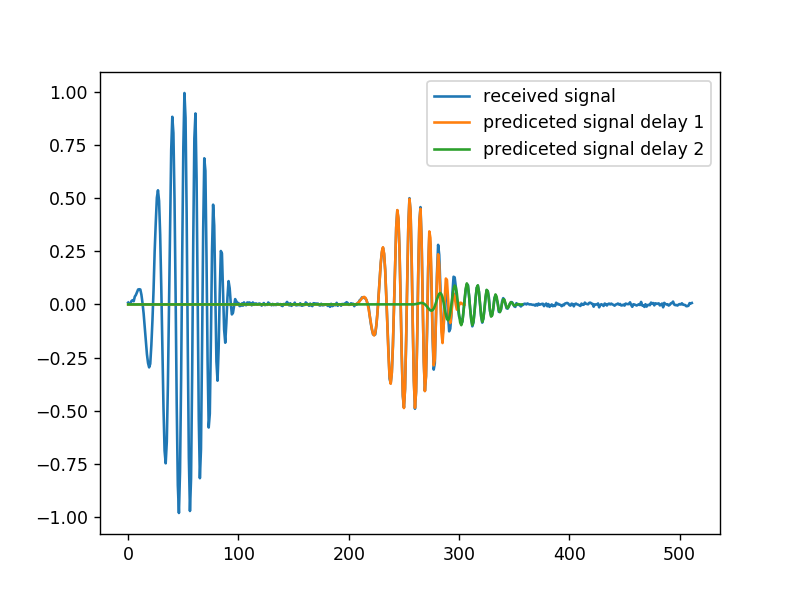

In [25]:
fig, ax = plt.subplots()
ax.plot(signal_distorted, label="received signal")
ax.plot(assumpt_signal_1, label="prediceted signal delay 1")
ax.plot(assumpt_signal_2, label="prediceted signal delay 2")
ax.legend()

In [117]:
import math
power = np.sum(signal_distorted*signal_distorted)
alpha = 0
# for p in range(1, 4):
min_power = 10**10
power_list = []
for i in range(1, 11):
    k = i/math.pow(10, 1)
    alpha = k
    assumpt_signal_1 = np.concatenate((np.zeros(zero_1), alpha*window_s))
    diff = signal_distorted[:len(assumpt_signal_1)] - assumpt_signal_1
    power_diff = np.sum(diff*diff)
    power_list.append(power_diff)
    if(power_diff < min_power):
        number = i
        min_power = power_diff
k_pre = number/10

for p in range(2):
    min_power = 10**10
    for i in range(-5, 6):
        k = i/math.pow(10, p+2)
        alpha = k_pre+k
        assumpt_signal_1 = np.concatenate((np.zeros(zero_1), alpha*window_s))
        diff = signal_distorted[:len(assumpt_signal_1)] - assumpt_signal_1
        power_diff = np.sum(diff*diff)
        power_list.append(power_diff)
        if(power_diff < min_power):
            number = i
            min_power = power_diff
    k_pre = k_pre + number/math.pow(10,p+2)

In [118]:
k_pre

0.563

<IPython.core.display.Javascript object>


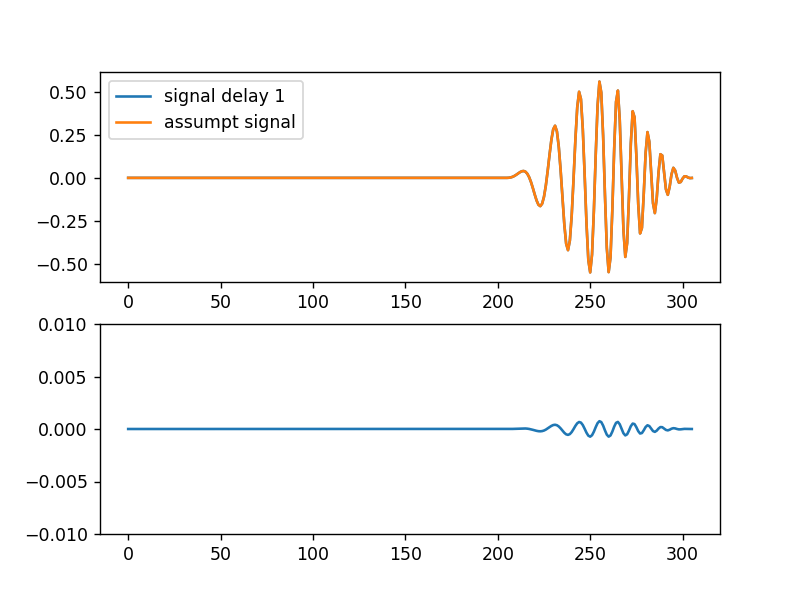

(-0.01, 0.01)

In [101]:
assumpt_signal_1 = np.concatenate((np.zeros(zero_1), 0.56275*window_s))
fig, ax = plt.subplots(2,1)
ax[0].plot(s_1[:len(assumpt_signal_1)], label="signal delay 1")
ax[0].plot(assumpt_signal_1, label="assumpt signal")
ax[0].legend()
ax[1].plot(assumpt_signal_1-s_1[:len(assumpt_signal_1)], label="difference between prediction and received signal")
ax[1].set_ylim([-0.01, 0.01])


In [103]:
(0.56275-0.562)/0.562*100

0.13345195729535894

In [106]:
k1_pre = 0.56275
k2_pre = 0.25555
s_1_pre = np.concatenate((np.zeros(zero_1), k1_pre*window_s))
s_1_pre = np.concatenate((s_1_pre, np.zeros(duration_total-len(s_1_pre))))
s_2_pre = np.concatenate((np.zeros(zero_2), k2_pre*window_s))
s_2_pre = np.concatenate((s_2_pre, np.zeros(duration_total-len(s_2_pre))))
signal_pre = s_origin + s_1_pre + s_2_pre

<IPython.core.display.Javascript object>


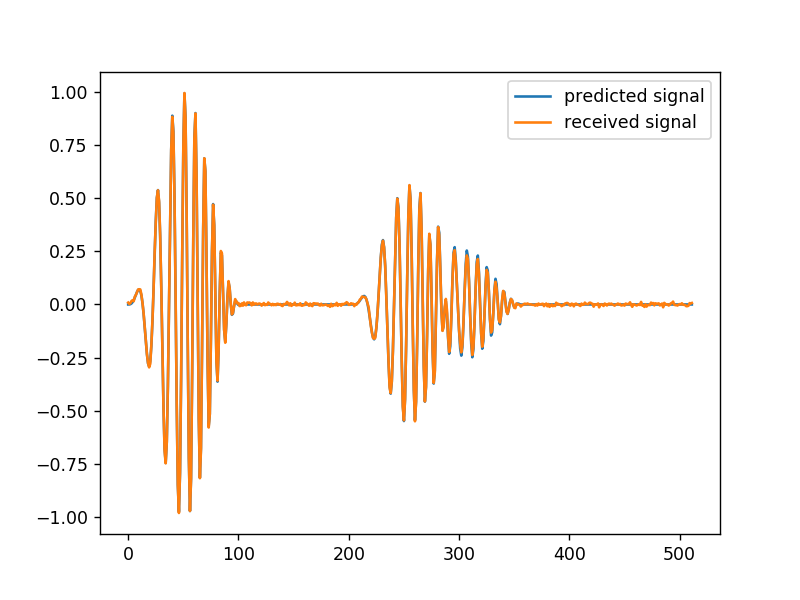

In [107]:
fig, ax = plt.subplots()
ax.plot(signal_pre, label="predicted signal")
ax.plot(signal_distorted, label="received signal")
ax.legend()

In [108]:
(k2_pre-0.239)/0.239*100

6.924686192468624

<IPython.core.display.Javascript object>


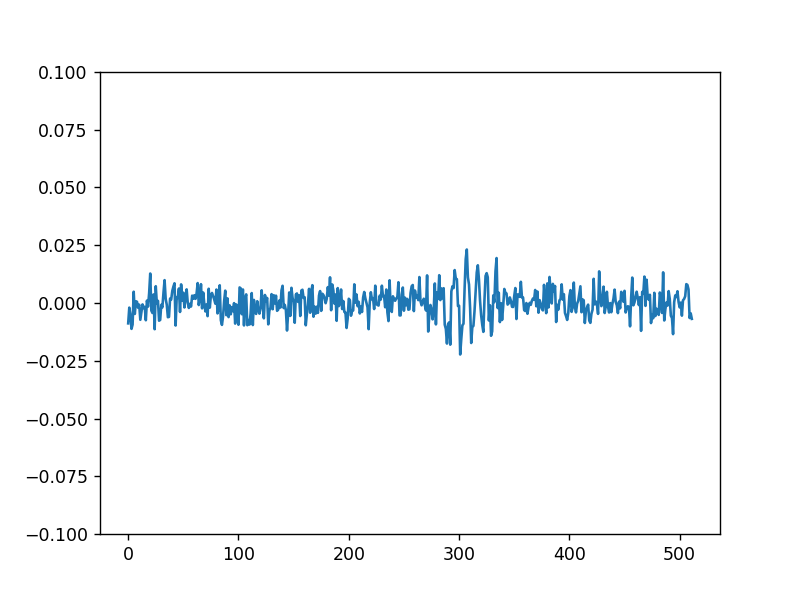

(-0.1, 0.1)

In [112]:
fig, ax = plt.subplots()
ax.plot(signal_pre-signal_distorted, label="difference")
ax.set_ylim([-0.1, 0.1])

In [214]:
import math
min_power = 10**10
window_length =int(len(window_s)/2)
delay = zero_1
for i in range(1, 11):
    alpha = i/math.pow(10, 1)
    assumpt_signal_1 = alpha*window_s
    assumpt_signal_1 = assumpt_signal_1[:window_length] 
    diff = signal_distorted[delay:delay+window_length] - assumpt_signal_1
    power_diff = np.sum(diff*diff)
    power_list.append(power_diff)
    if(power_diff < min_power):
        number = i
        min_power = power_diff
k_pre = number/10

for p in range(5):
    min_power = 10**10
    for i in range(-5, 6):
        k = i/math.pow(10, p+2)
        alpha = k_pre+k
        assumpt_signal_1 = alpha*window_s
        assumpt_signal_1 = assumpt_signal_1[:window_length] 
        diff = signal_distorted[delay:delay+window_length] - assumpt_signal_1
        
        power_diff = np.sum(diff*diff)
        power_list.append(power_diff)
        if(power_diff < min_power):
            number = i
            min_power = power_diff
    k_pre = k_pre + number/math.pow(10,p+2)
k_pre

0.06026200000000001

<IPython.core.display.Javascript object>


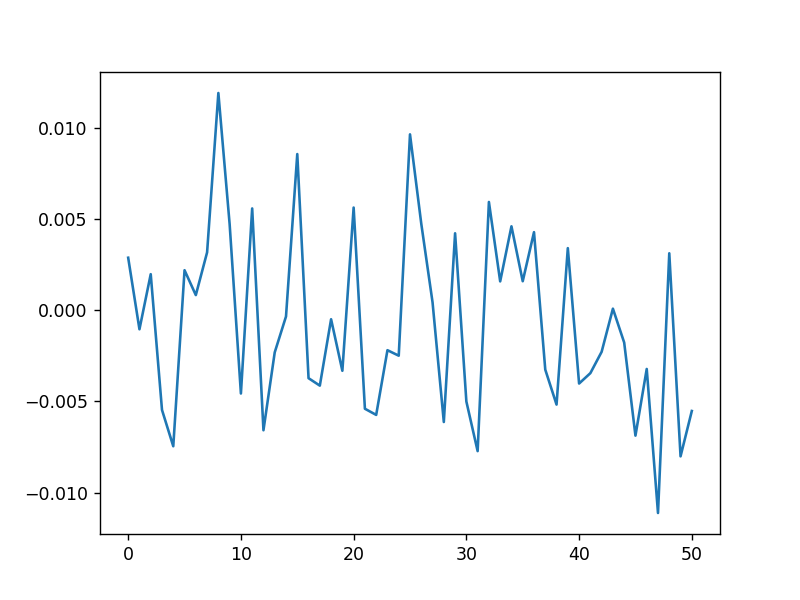

In [207]:
alpha = 0.125/3
window_length =int(len(window_s)/2)
delay = zero_1
assumpt_signal_1 = alpha*window_s
assumpt_signal_1 = assumpt_signal_1[:window_length] 
diff = signal_distorted[delay:delay+window_length] - assumpt_signal_1
fig, ax = plt.subplots()
ax.plot(diff)


In [208]:
0.125/3

0.041666666666666664

In [201]:
0.125/3

0.041666666666666664

In [205]:
import math
min_power = 10**10
window_length =int(len(window_s)/2)
window_total_length = len(window_s)
delay = zero_2
for i in range(1, 11):
    alpha = i/math.pow(10, 1)
    assumpt_signal_1 = alpha*window_s
    assumpt_signal_1 = assumpt_signal_1[window_length:] 
    diff = signal_distorted[delay+window_length:delay+window_total_length] - assumpt_signal_1
    power_diff = np.sum(diff*diff)
    power_list.append(power_diff)
    if(power_diff < min_power):
        number = i
        min_power = power_diff
k_pre = number/10

for p in range(5):
    min_power = 10**10
    for i in range(-5, 6):
        k = i/math.pow(10, p+2)
        alpha = k_pre+k
        assumpt_signal_1 = alpha*window_s
        assumpt_signal_1 = assumpt_signal_1[window_length:] 
        diff = signal_distorted[delay+window_length:delay+window_total_length] - assumpt_signal_1
        
        power_diff = np.sum(diff*diff)
        power_list.append(power_diff)
        if(power_diff < min_power):
            number = i
            min_power = power_diff
    k_pre = k_pre + number/math.pow(10,p+2)
k_pre

0.044445000000000005

In [204]:
import math
min_power = 10**10
window_total_length = len(window_s)
delay = zero_2
for i in range(1, 11):
    alpha = i/math.pow(10, 1)
    assumpt_signal_1 = alpha*window_s 
    diff = signal_distorted[delay:delay+window_total_length] - assumpt_signal_1
    power_diff = np.sum(diff*diff)
    power_list.append(power_diff)
    if(power_diff < min_power):
        number = i
        min_power = power_diff
k_pre = number/10

for p in range(5):
    min_power = 10**10
    for i in range(-5, 6):
        k = i/math.pow(10, p+2)
        alpha = k_pre+k
        assumpt_signal_1 = alpha*window_s
        diff = signal_distorted[delay:delay+window_total_length] - assumpt_signal_1
        
        power_diff = np.sum(diff*diff)
        power_list.append(power_diff)
        if(power_diff < min_power):
            number = i
            min_power = power_diff
    k_pre = k_pre + number/math.pow(10,p+2)
k_pre

0.044445000000000005

In [119]:
a = [1,2,3,4,5,6]
a = np.array(a)
a[2:4] = 0
a

array([1, 2, 0, 0, 5, 6])